# Analysis
Observations:
1. Urban city types generally have a higher driver count that suburban and rural city types.
2. The greater total number of rides per city normally generates in a lower avg fare.
3. All Urban city types combined have the highest total fares, total rides, and total drivers by city than all suburban and rural city types combined.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Save file path to variable
city = "raw_data/city_data.csv"
ride = "raw_data/ride_data.csv"

In [3]:
# Read with Pandas in to Dataframes
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [4]:
# Print first five rows in city data
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
# Print first five rows in ride data
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Group by city and calculate avg fare, total fare and ride count
def fare(group):
    return {'ride_ct': group.count(), 'fare_total': group.sum(), 'fare_avg': np.round(group.mean(),2)}
new_ride_df = ride_df['fare'].groupby(ride_df['city']).apply(fare).unstack()
new_ride_df['city'] = new_ride_df.index
new_ride_df.head()

,fare_avg,fare_total,ride_ct,city
city,,,,
Alvarezhaven,23.93,741.79,31.0,Alvarezhaven
Alyssaberg,20.61,535.85,26.0,Alyssaberg
Anitamouth,37.32,335.84,9.0,Anitamouth
Antoniomouth,23.62,519.75,22.0,Antoniomouth
Aprilchester,21.98,417.65,19.0,Aprilchester


In [7]:
# Merge city_df and new_ride_df using right join
merge = pd.merge(city_df, new_ride_df, on="city", how="right")
merge.head()

,city,driver_count,type,fare_avg,fare_total,ride_ct
0,Kelseyland,63,Urban,21.81,610.58,28.0
1,Nguyenbury,8,Urban,25.90,673.39,26.0
2,East Douglas,12,Urban,26.17,575.72,22.0
3,West Dawnfurt,34,Urban,22.33,647.58,29.0
4,Rodriguezburgh,52,Urban,21.33,490.65,23.0


# Bubble Plot of Ride Sharing Data

In [8]:
# Group data by city type
urban = merge.loc[(merge["type"] == "Urban")]
suburban = merge.loc[(merge["type"] == "Suburban")]
rural = merge.loc[(merge["type"] == "Rural")]

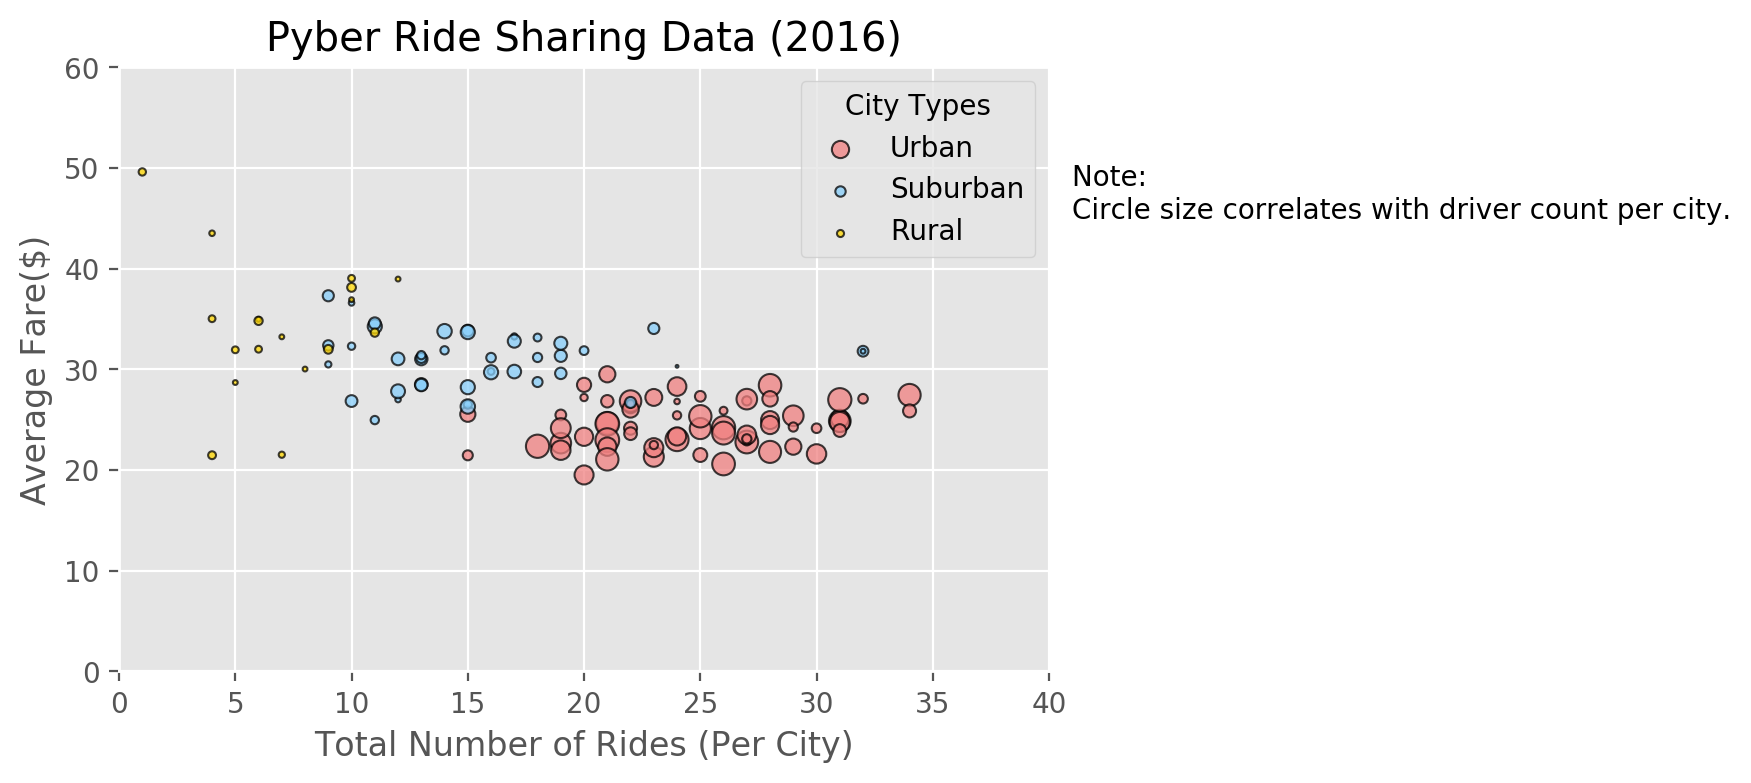

In [11]:
# Set size for chart
fig = plt.figure(dpi=200)

# Create scatter/bubble plot for each city type
plt.scatter(urban['ride_ct'], urban['fare_avg'], linewidths = .75, alpha=.75, label = "Urban",
            color = 'lightcoral', edgecolor='black', s=urban['driver_count'], edgecolors="black")

plt.scatter(suburban['ride_ct'], suburban['fare_avg'], linewidths = .75, alpha=.75, label = "Suburban",
            color = 'lightskyblue', edgecolor='black', s=suburban['driver_count'], edgecolors="black")

plt.scatter(rural['ride_ct'], rural['fare_avg'], linewidths = .75, alpha=.75, label = "Rural",
            color = 'gold', edgecolor='black', s=rural['driver_count'], edgecolors="black")

# Set x and y axis limits
plt.ylim(0, 60)
plt.xlim(0, 40)

# Create title and axis labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create note for circle size correlation
plt.text(41, 45, "Note: \nCircle size correlates with driver count per city.")

# Grid lines and formatting
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')

# Create legend
plt.legend(loc='upper right', title = 'City Types')

# Display bubble plot
plt.show()

In [12]:
# Split up data into groups based upon city "type".
city_type = merge.groupby('type')

# Total Fares by City Type

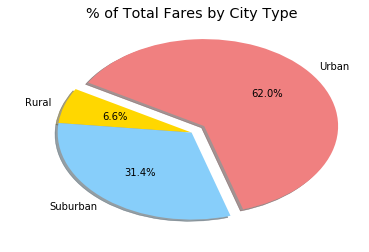

In [13]:
# Sum fares_total column from city_type data frame
city_type_fares = city_type ['fare_total'].sum()

# Explode and color settings
explode = (0, 0, .12)
colors = ['gold', 'lightskyblue', 'lightcoral']

# Create pie chart with explode, colors, and additional settings
fares_pie = city_type_fares.plot(kind="pie", y=city_type_fares, explode=explode, colors=colors, 
                                   autopct='%1.1f%%', shadow=True, startangle=150, title=("% of Total Fares by City Type"))

# Set Y axis label to blank
fares_pie.set_ylabel(" ")

# Display pie chart
plt.show()

# Total Rides by City Type

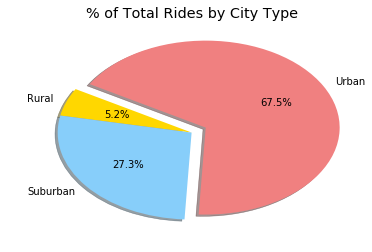

In [14]:
# Sum ride_ct column from city_type data frame
city_type_rides = city_type['ride_ct'].sum()

# Explode and color settings
explode = (0, 0, .12)
colors = ['gold', 'lightskyblue', 'lightcoral']

# Create pie chart with explode, colors, and additional settings
rides_pie = city_type_rides.plot(kind="pie", y=city_type_rides, explode=explode, colors=colors, 
                                 autopct='%1.1f%%', shadow=True, startangle=150, title=("% of Total Rides by City Type"))

# Set Y axis label to blank
rides_pie.set_ylabel(" ")

# Display pie chart
plt.show()

# Total Drivers by City Type

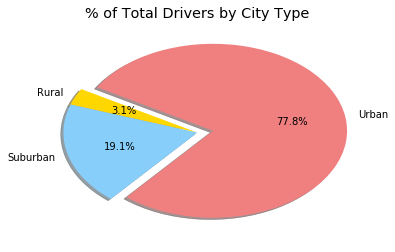

In [15]:
# Sum drivers_count column from city_type data frame
city_type_drivers = city_type['driver_count'].sum()

# Explode and color settings
explode = (0, 0, .12)
colors = ['gold', 'lightskyblue', 'lightcoral']

# Create pie chart with explode, colors, and additional settings
drivers_pie = city_type_drivers.plot(kind="pie", y=city_type_drivers, explode=explode, colors=colors, 
                                     autopct='%1.1f%%', shadow=True, startangle=150, title=("% of Total Drivers by City Type"))

# Set Y axis label to blank
drivers_pie.set_ylabel(" ")

# Display pie chart
plt.show()